# **Python für Ingenieure**
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

## 8.2. Dynamische und interaktive Plot-Beispiele

Um einen Plot dynamisch anpassen zu können, muss das Paket *ipympl* in die Anaconda-Umgebung installiert werden, falls es noch nicht vorhanden ist:
```shell
    conda install ipympl
```

Für interaktive Plots wird das Modul [*ipywidgets*](https://ipywidgets.readthedocs.io/en/latest/) verwendet.

Um ein in diesen Modulen enthaltenes Steuer- oder Plot-Element  ("widget", dt.: "Dings") in JupyterLab direkt verwenden zu können, muss noch eine entsprechende Erweiterung installiert werden. Dazu führt man in der Kommandozeile aus:
```shell
    jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

Möglicherweise muss zuvor noch node.js installiert werden:
```shell
    conda install nodejs
```
****************************************
# ** Python for engineers **
<! - Licensed under (CC BY 2.0) Gert Herold, 2020 ->

## 8.2. Dynamic and interactive plot examples

In order to be able to adapt a plot dynamically, the package * ipympl * must be installed in the Anaconda environment if it is not already available:
`` shell
     conda install ipympl
``

The module [* ipywidgets *](https://ipywidgets.readthedocs.io/en/latest/) is used for interactive plots.

In order to be able to use a control or plot element ("widget") contained in these modules directly in JupyterLab, a corresponding extension must be installed. To do this, run in the command line:
`` shell
     jupyter labextension install @ jupyter-widgets / jupyterlab-manager
``

Possibly node.js has to be installed beforehand:
`` shell
     conda install nodejs
``





### 8.2.1. Dynamische Plots

Für dynamischen Plot Skript einleiten mit 
```python 
    %matplotlib widget
```

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

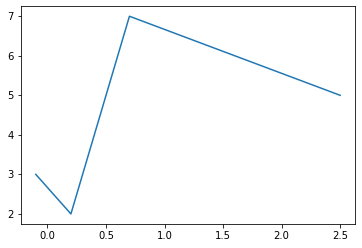

In [9]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

x = [-0.1,0.2,0.7,2.5]
y = [3,2,7,5]

plt.plot(x, y)
plt.show()

### 8.2.2. Interaktive Steuerelemente und Plots

In [10]:
import ipywidgets as widgets

def f(x):
    return x**2

widgets.interact(f, x=10);

100

**Beispiel: Funktionsplot mit Parametern**

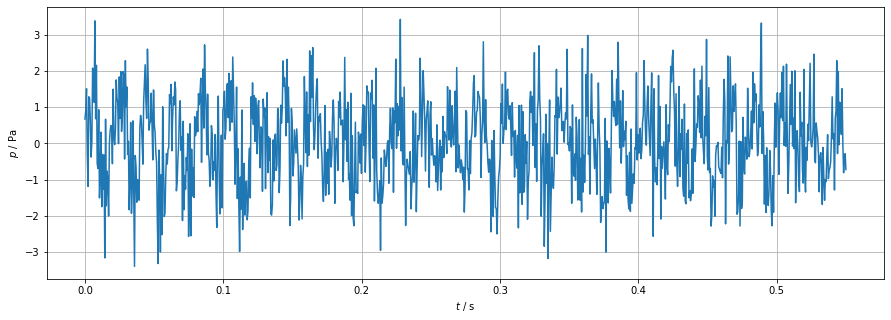

In [11]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

@widgets.interact
def plot_signal(f=(1,100),tmax=(0.1,1,0.01), tone_amp = (0.0,2,0.1), noise_amp = (0.0,2,0.1)):
    
    plt.figure(2,(15,5))
    t = np.linspace(0,tmax,1000)
    p = np.sin(2*np.pi*f*t)*tone_amp
    noise = np.random.randn(1000)*noise_amp
    
    #fs = 1/(t[1]-t[0])
    #print(f'Abtastfrequenz: {fs:.2f} Hz')
    
    plt.plot(t,p+noise)
    plt.grid(True)
    plt.xlabel('$t$ / s')
    plt.ylabel('$p$ / Pa')
    plt.show()


"Flackern" verhindern:

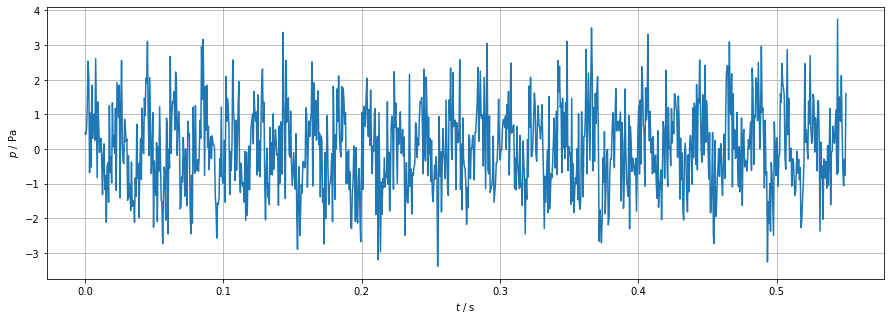

In [12]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def plot_signal(f, tmax, tone_amp, noise_amp):
    
    plt.figure(2,(15,5))
    t = np.linspace(0,tmax,1000)
    p = np.sin(2*np.pi*f*t)*tone_amp
    noise = np.random.randn(1000)*noise_amp
    
    plt.plot(t,p+noise)
    plt.grid(True)
    plt.xlabel('$t$ / s')
    plt.ylabel('$p$ / Pa')
    plt.show()
    
grafik = widgets.interactive(plot_signal, f=(1,100),tmax=(0.1,1,0.01), tone_amp = (0.0,2,0.1), noise_amp = (0.0,2,0.1))
ausgabefenster = grafik.children[-1]
ausgabefenster.layout.height = '5in'
grafik

Aktuelle Parameter ausgeben / weiterverwenden:

In [13]:
for param in grafik.children[0:-1]:
    print(param.description,':',param.value)

f : 50
tmax : 0.55
tone_amp : 1.0
noise_amp : 1.0


Dokumentation weiterer Widget-Einstellungen: https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [14]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
from glob import glob


impath = '../notebooks_HA/HA3/img/'
flist = glob(impath+'*.*')

@widgets.interact
def zeig_bild(dateiname=flist):
    im = plt.imread(dateiname)
    plt.figure(3,(15,15))
    plt.imshow(im)
    plt.axis('off')
    plt.show()


ValueError: fname must be a PathLike or file handle